In [1]:
this_file_name = 'generating_lemniscate_curve.ipynb'
import sys
import os
sys.path.insert(0, os.path.abspath(
    os.path.join(os.path.dirname(this_file_name), '../../src/') ))
from utils import *
from lemniscate import *
# from trajectory import CubicPolynomials
import matplotlib.pyplot as plt
import math
import numpy as np

# Plotting Lemniscate points

In [11]:
def plotting_lemniscate(r_x=2, r_y=2, number_of_points=20):
    # generating lemniscate curve and its derivative
    lem = Lemniscate(r_x,r_y)
    lem_position, lem_velocity, lem_acceleration, lem_orientation = lem.get_curve_points(number_of_points)

    # visualizing...
    x_coordinate = np.cos(lem_orientation[:]) # projecting on X using cossine
    y_coordinate = np.sin(lem_orientation[:]) # projecting on Y using sine

    #plotting
    plt.quiver(lem_position[:,0], lem_position[:,1],x_coordinate,y_coordinate)

# Testing the Lemniscate Class

## Bad Instances

In [3]:
lem1 = Lemniscate(-0.1,2)

ValueError: a_x must be greater than 0 and less than 2.5

In [ ]:
lem2 = Lemniscate(2.6,2)

ValueError: r_x must be greater than 0 and less than 2.5

In [ ]:
lem3 = Lemniscate(2,-0.1)

ValueError: r_y must be greater than 0 and less than 2.5

In [ ]:
lem4 = Lemniscate(2,2.6)

ValueError: r_y must be greater than 0 and less than 2.5

## Plotting some curves

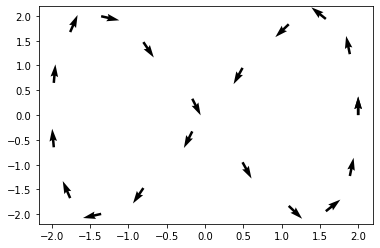

In [12]:
plotting_lemniscate()

## Sending it to Sim (1st Project 2nd Goal Scene)

In [3]:
# Conectar no Vrep
clientID = connect_2_sim()
test_connection(clientID)

Connected to remote API server
Number of objects in the scene:  56


In [4]:
list_of_points = []
for index in range(0,49):
    point = lemniscate[index,:].tolist()
    point.append(lemniscate_orientation[index])
    list_of_points.append(point)
points = np.array(list_of_points)
points[10,:]

array([ 0.56905517,  1.0910698 , -2.09032593])

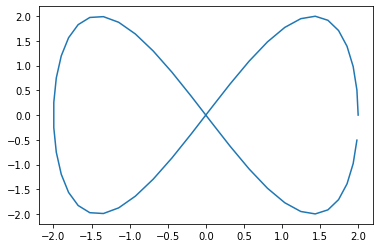

In [5]:
plt.plot(points[:,0],points[:,1])

In [6]:
# Enviar pontos do Caminho Gerado
send_points_to_sim([p[1:3] for p in points], clientID=clientID)

[0.         1.57079633]
[0.50730917 1.63680071]
[0.9814351  1.71533908]
[1.3913651  1.82628892]
[1.71028553 2.01286233]
[1.91733571 2.38108329]
[1.99897243 3.04970786]
[ 1.94985582 -2.62410556]
[ 1.77319861 -2.31693086]
[ 1.48055599 -2.1680154 ]
[ 1.0910698  -2.09032593]
[ 0.63021644 -2.05038355]
[ 0.12814044 -2.03506134]
[-0.38231726 -2.0400599 ]
[-0.86776748 -2.06673767]
[-1.29645679 -2.12307222]
[-1.64034451 -2.23000728]
[-1.87693684 -2.44165788]
[-1.99075823 -2.88776398]
[-1.97436357  2.68402845]
[-1.82882525  2.16376266]
[-1.56366296  1.90564169]
[-1.19622106  1.76491595]
[-0.75053401  1.67354849]
[-0.25575432  1.6030854 ]
[0.25575432 1.53850726]
[0.75053401 1.46804416]
[1.19622106 1.3766767 ]
[1.56366296 1.23595097]
[1.82882525 0.97782999]
[1.97436357 0.4575642 ]
[ 1.99075823 -0.25382867]
[ 1.87693684 -0.69993477]
[ 1.64034451 -0.91158537]
[ 1.29645679 -1.01852043]
[ 0.86776748 -1.07485498]
[ 0.38231726 -1.10153275]
[-0.12814044 -1.10653131]
[-0.63021644 -1.09120911]
[-1.0910698 

# Generating curves between each pair of points